# ADVANCED HOUSE PRICE PREDICTION

In [92]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',None)
%matplotlib inline

In [93]:
#read dataset
df=pd.read_csv('train.csv')

In [94]:
df.shape

(1460, 81)

## EXPLORATORY DATA ANALYSIS

In [95]:
#print top 5 rows 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [96]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Missing values

In [97]:
features_with_nullvalues=[feature for feature in df.columns if df[feature].isna().sum()>0 ]
for i in features_with_nullvalues:
    print(i,"---->",np.round(df[i].isna().mean(),4),"% null values")

LotFrontage ----> 0.1774 % null values
Alley ----> 0.9377 % null values
MasVnrType ----> 0.0055 % null values
MasVnrArea ----> 0.0055 % null values
BsmtQual ----> 0.0253 % null values
BsmtCond ----> 0.0253 % null values
BsmtExposure ----> 0.026 % null values
BsmtFinType1 ----> 0.0253 % null values
BsmtFinType2 ----> 0.026 % null values
Electrical ----> 0.0007 % null values
FireplaceQu ----> 0.4726 % null values
GarageType ----> 0.0555 % null values
GarageYrBlt ----> 0.0555 % null values
GarageFinish ----> 0.0555 % null values
GarageQual ----> 0.0555 % null values
GarageCond ----> 0.0555 % null values
PoolQC ----> 0.9952 % null values
Fence ----> 0.8075 % null values
MiscFeature ----> 0.963 % null values


## Checking if null values are important w.r.t dependent variable

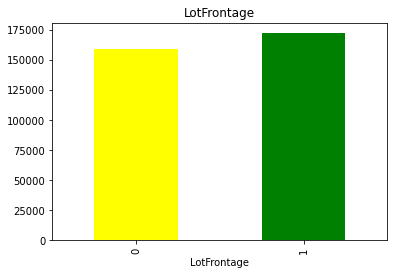

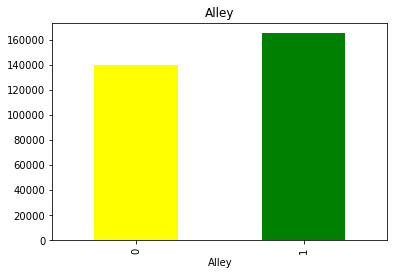

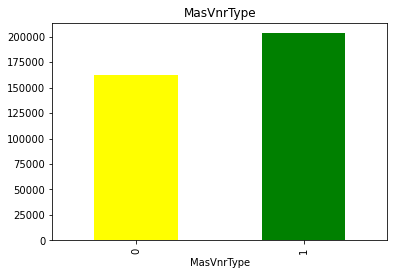

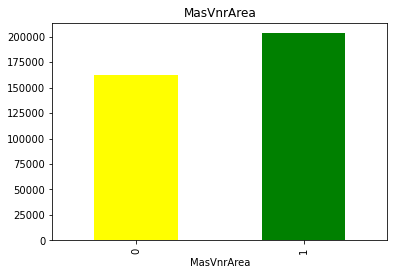

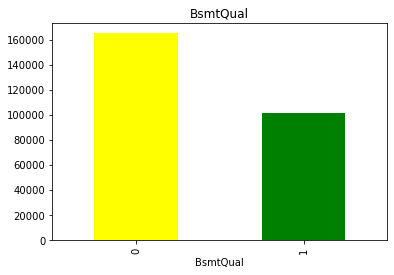

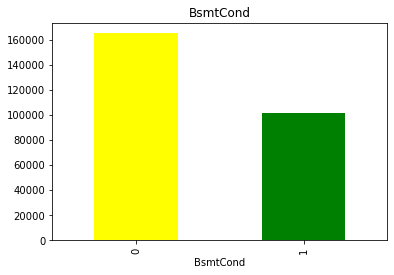

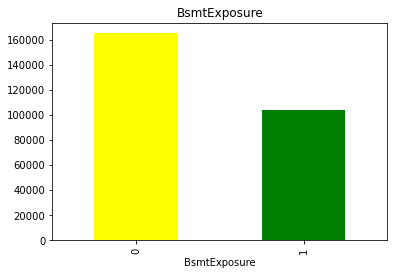

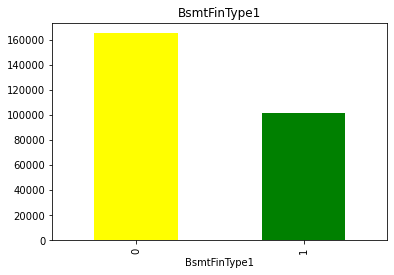

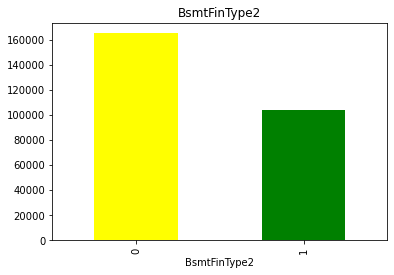

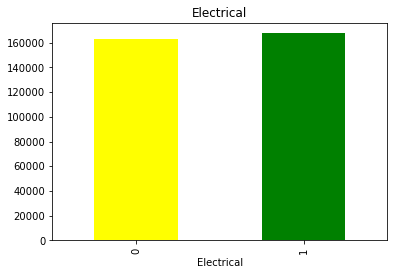

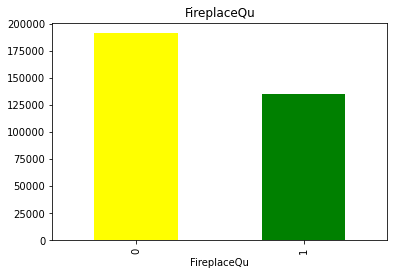

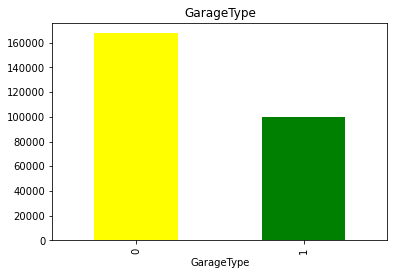

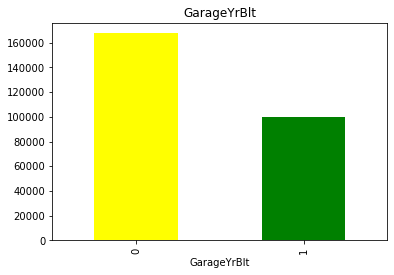

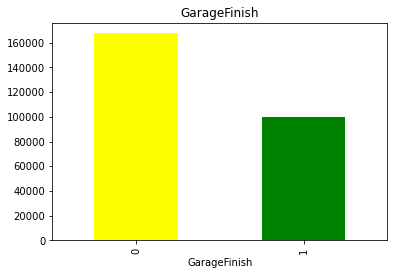

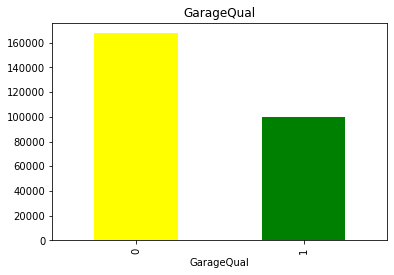

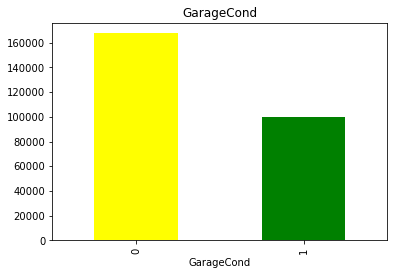

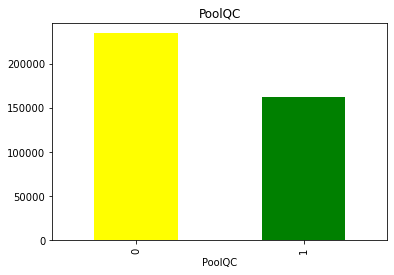

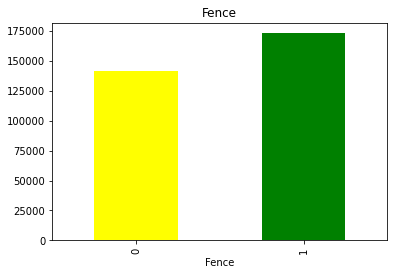

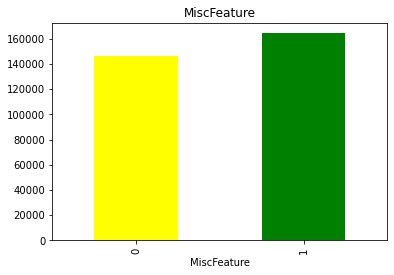

In [98]:
for feature in features_with_nullvalues:
    data=df.copy()
    
    data[feature]=np.where(df[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar(color=['yellow','green'])
    plt.title(feature)
    plt.show()
    

It is clearly understood that there is a variation in median of sale price wherever the respective feature had null values

# Numerical variables

In [99]:
#finding the numerical features
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']

print(len(numerical_features))

df[numerical_features].head()

38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


# Date/Time variables

In [100]:
dt_time_variables = [feature for feature in df.columns if 'Year' in feature or 'Yr' in feature]

In [101]:
df[dt_time_variables].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


### Median of Sale Price vs Year sold

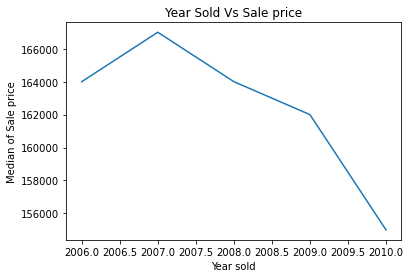

In [102]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year sold')
plt.ylabel('Median of Sale price')
plt.title('Year Sold Vs Sale price')
plt.show()

### Plotting the difference of other temporal variables and YrSold with SalePrice

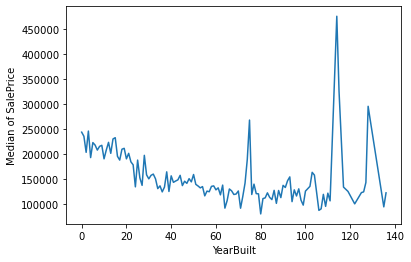

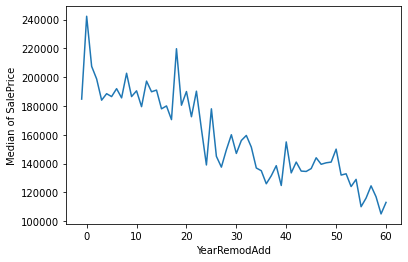

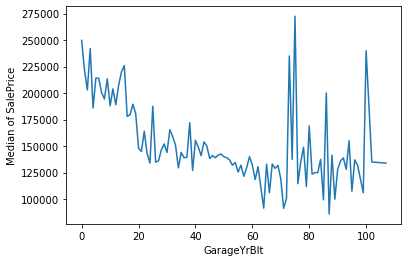

In [103]:
for feature in dt_time_variables:
    if feature!='YrSold':
        data=df.copy()

        data[feature]=data['YrSold']-data[feature]

        data.groupby(feature)['SalePrice'].median().plot()
        plt.xlabel(feature)
        plt.ylabel('Median of SalePrice')
        plt.show()

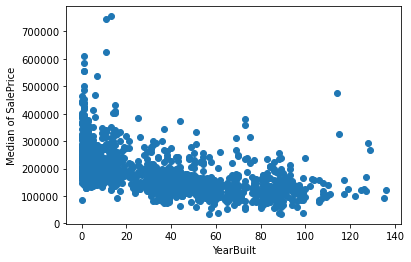

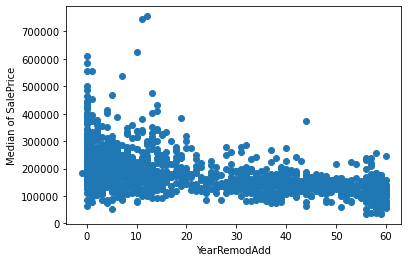

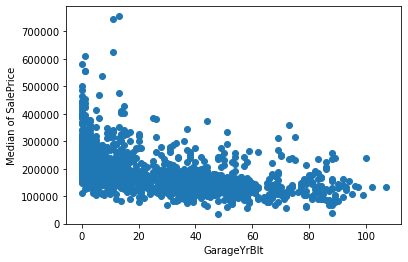

In [104]:
for feature in dt_time_variables:
    if feature!='YrSold':
        data1=df.copy()

        data1[feature]=data1['YrSold']-data1[feature]

        plt.scatter(data1[feature],data1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Median of SalePrice')
        plt.show()

### Discrete Variables 

In [105]:
#finding out discrete features
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in dt_time_variables+['Id']]

In [106]:
len(discrete_features)

17

In [107]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [108]:
df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


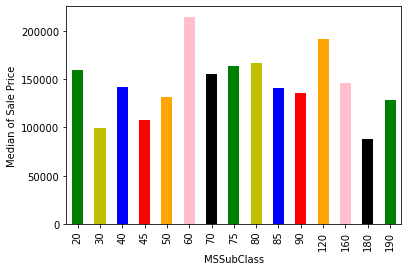

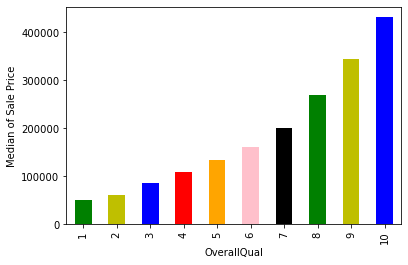

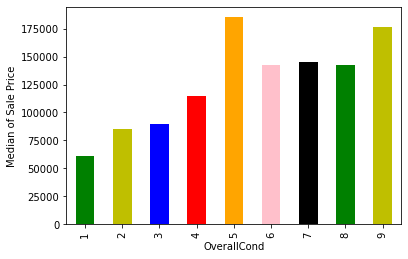

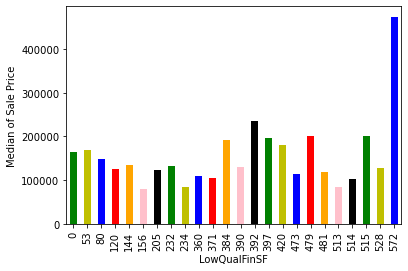

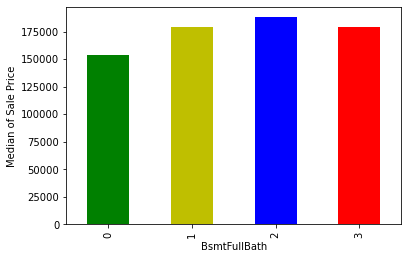

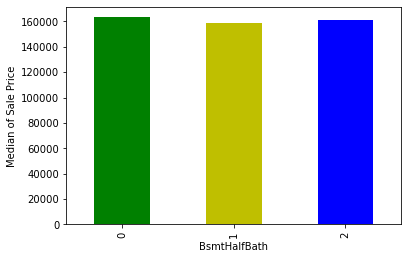

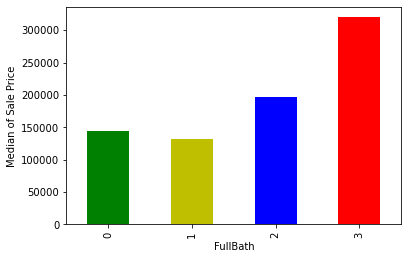

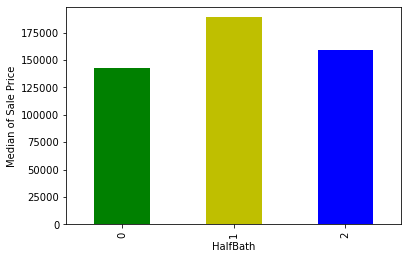

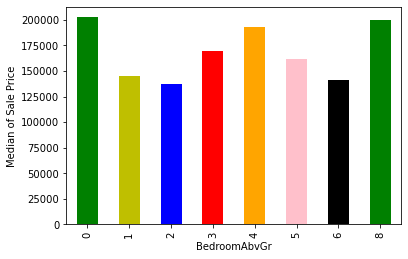

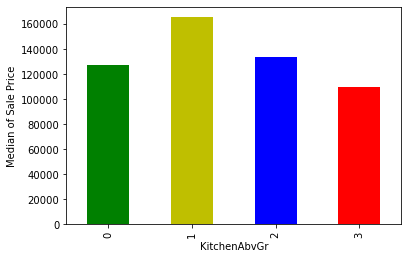

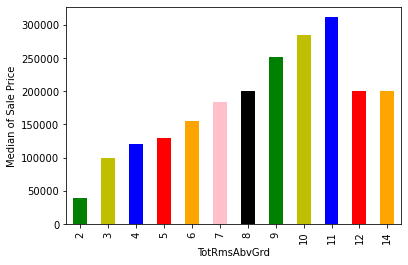

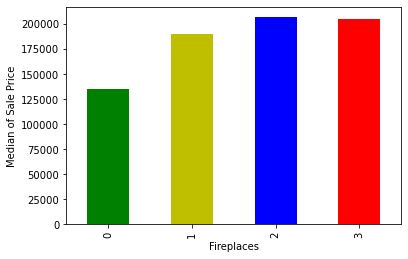

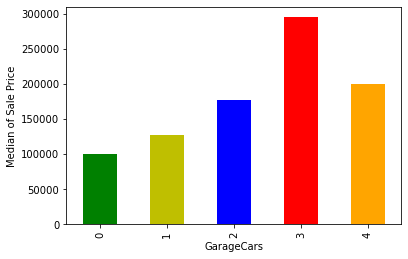

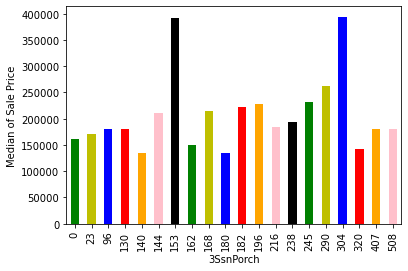

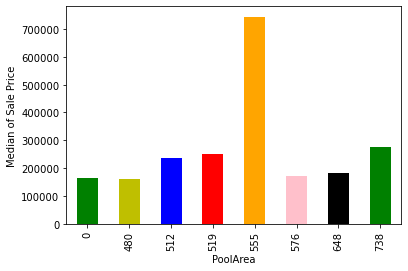

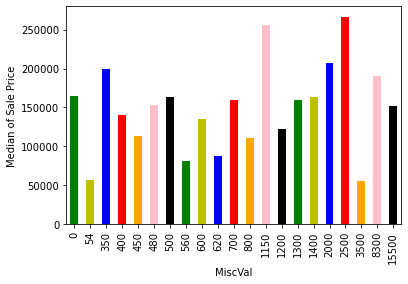

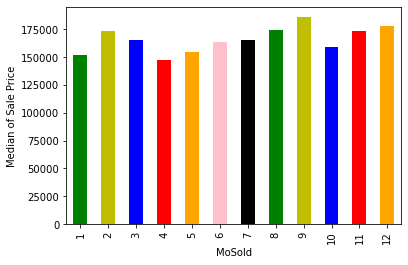

In [109]:
#finding the relationship between discrete features and SalePrice

for feature in discrete_features:
    data=df.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.bar(color=['g','y','b','r','Orange','Pink','black'])
    plt.xlabel(feature)
    plt.ylabel('Median of Sale Price')
    plt.show()

### Continous Variables

In [110]:
continous_varibles=[feature for feature in numerical_features if feature not in discrete_features + dt_time_variables +['Id']]

In [111]:
len(continous_varibles)

16

In [112]:
continous_varibles

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

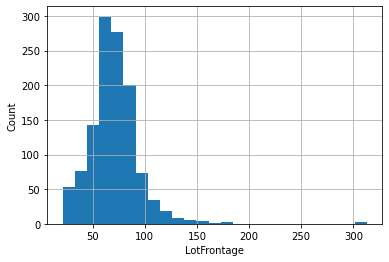

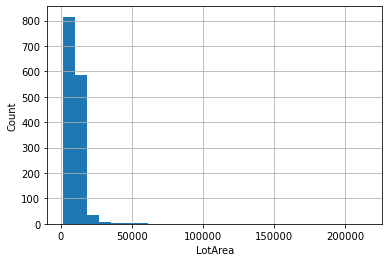

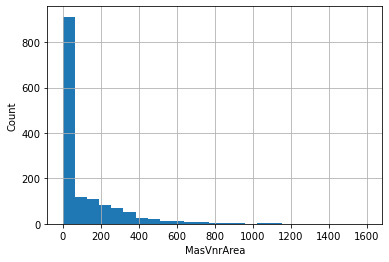

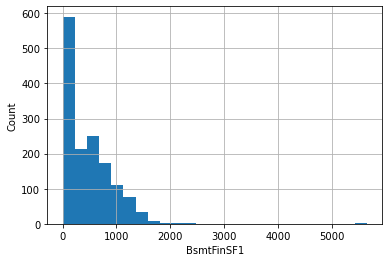

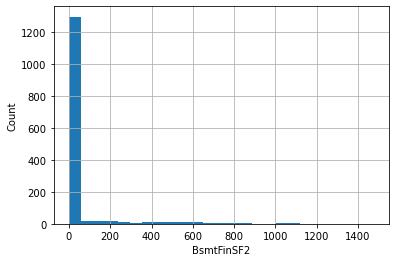

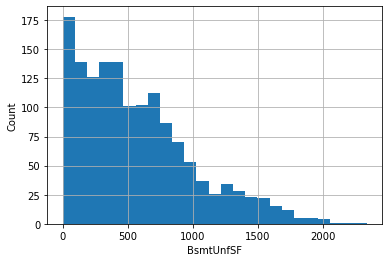

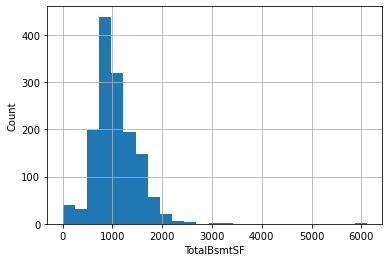

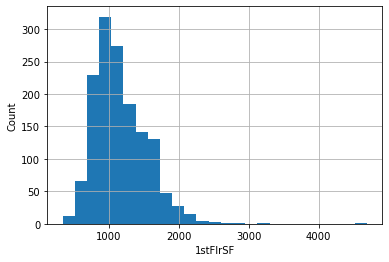

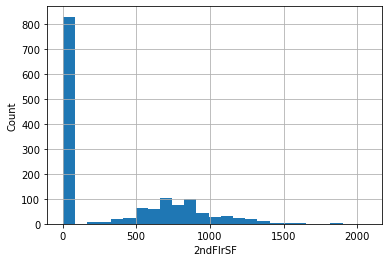

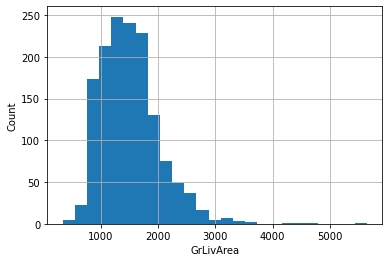

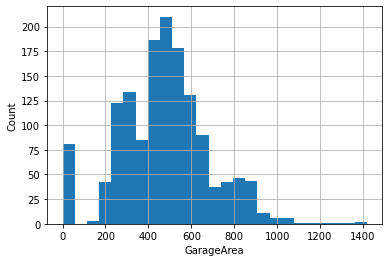

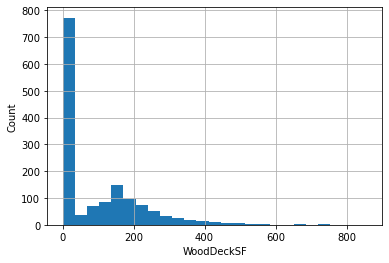

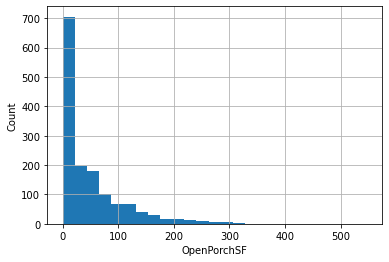

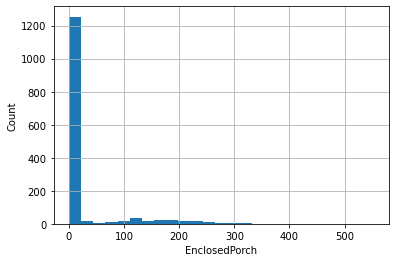

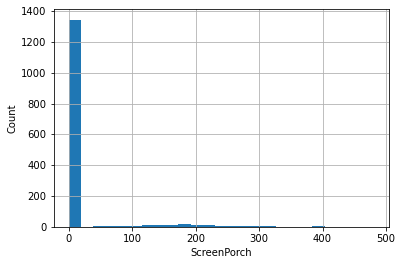

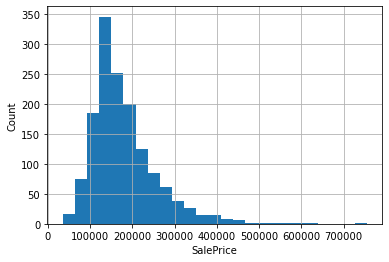

In [113]:
#Analyzing the distribution of continous variables
for feature in continous_varibles:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

### Log Transformation

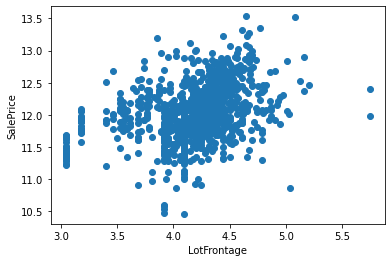

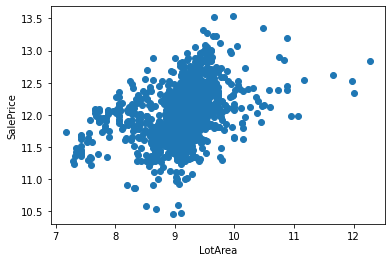

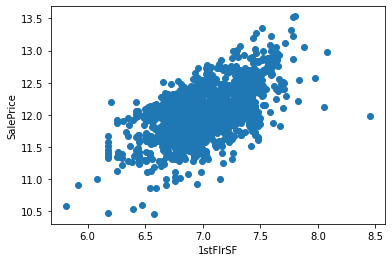

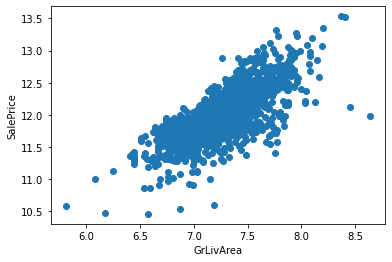

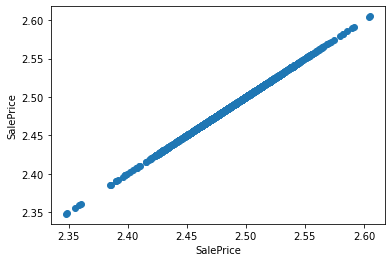

In [114]:
#log transformation
for feature in continous_varibles:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

## Outliers

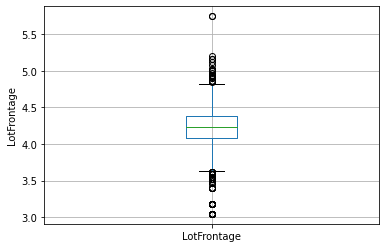

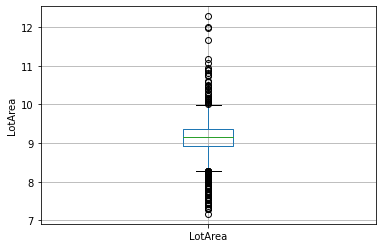

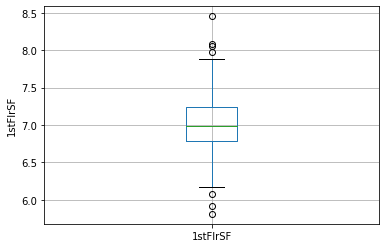

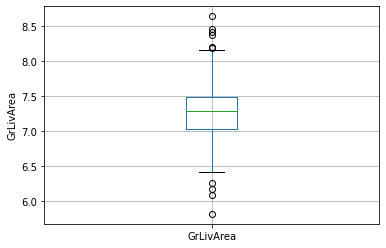

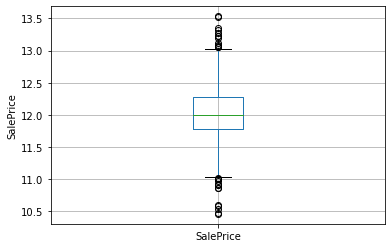

In [115]:
for feature in continous_varibles:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(feature)
        plt.ylabel(feature)
        plt.show()

## Categorical variables

In [116]:
categorical_variables=[feature for feature in df.columns if df[feature].dtypes=='O']

In [117]:
categorical_variables

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [118]:
df[categorical_variables].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [119]:
for feature in categorical_variables:
    print(feature,"------>",len(df[feature].unique()))

MSZoning ------> 5
Street ------> 2
Alley ------> 3
LotShape ------> 4
LandContour ------> 4
Utilities ------> 2
LotConfig ------> 5
LandSlope ------> 3
Neighborhood ------> 25
Condition1 ------> 9
Condition2 ------> 8
BldgType ------> 5
HouseStyle ------> 8
RoofStyle ------> 6
RoofMatl ------> 8
Exterior1st ------> 15
Exterior2nd ------> 16
MasVnrType ------> 5
ExterQual ------> 4
ExterCond ------> 5
Foundation ------> 6
BsmtQual ------> 5
BsmtCond ------> 5
BsmtExposure ------> 5
BsmtFinType1 ------> 7
BsmtFinType2 ------> 7
Heating ------> 6
HeatingQC ------> 5
CentralAir ------> 2
Electrical ------> 6
KitchenQual ------> 4
Functional ------> 7
FireplaceQu ------> 6
GarageType ------> 7
GarageFinish ------> 4
GarageQual ------> 6
GarageCond ------> 6
PavedDrive ------> 3
PoolQC ------> 4
Fence ------> 5
MiscFeature ------> 5
SaleType ------> 9
SaleCondition ------> 6


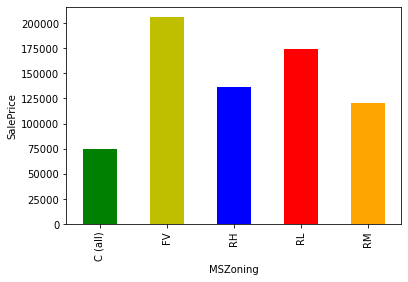

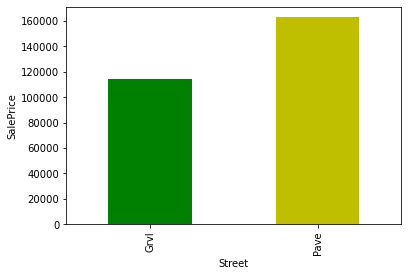

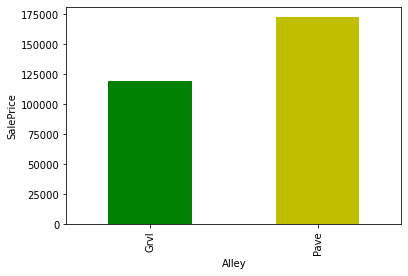

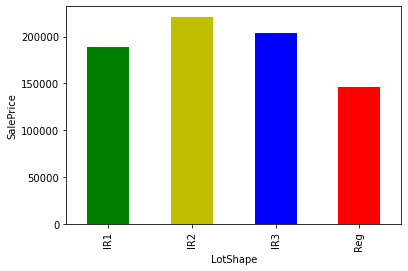

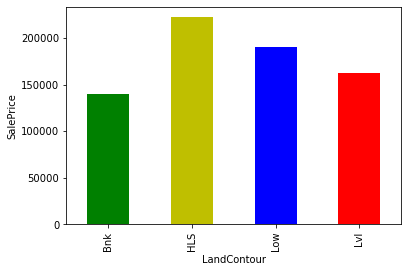

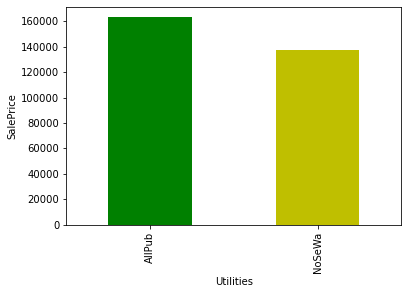

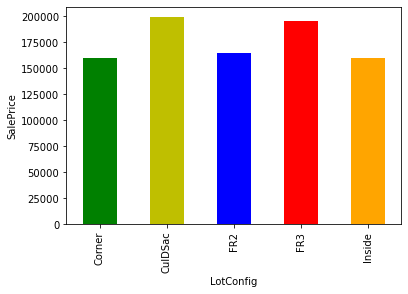

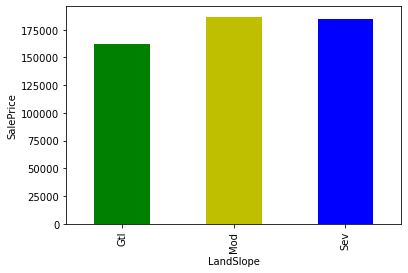

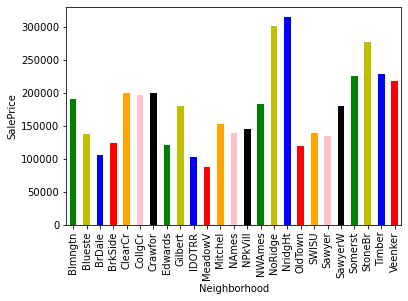

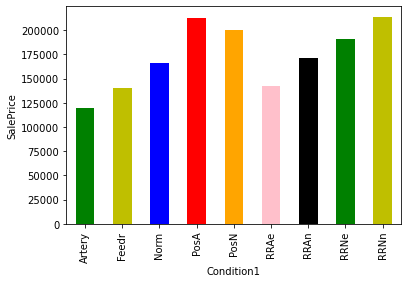

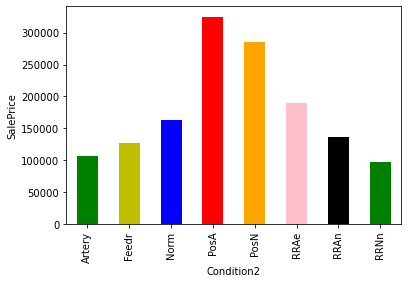

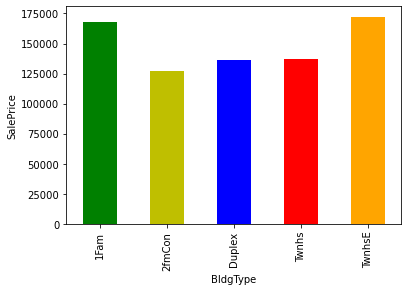

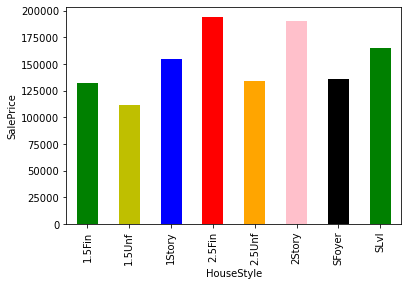

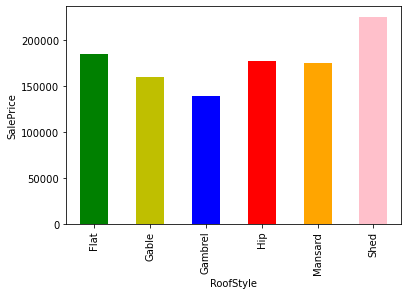

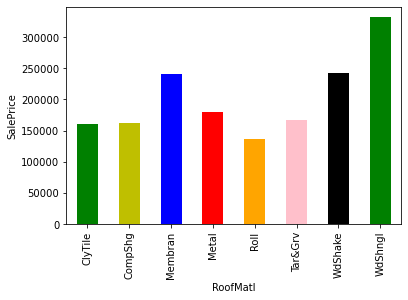

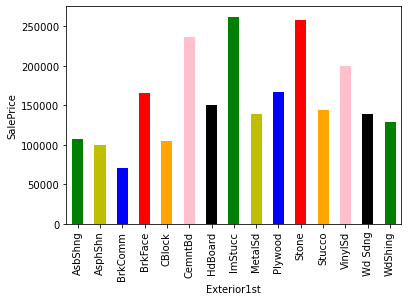

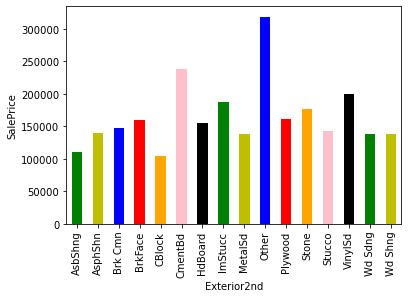

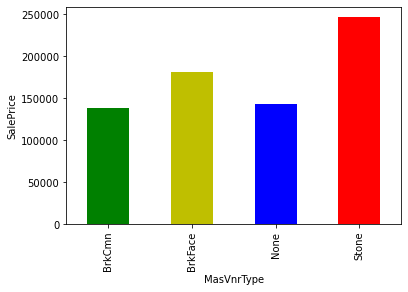

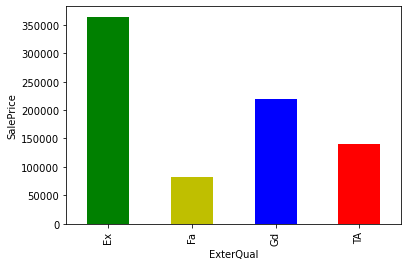

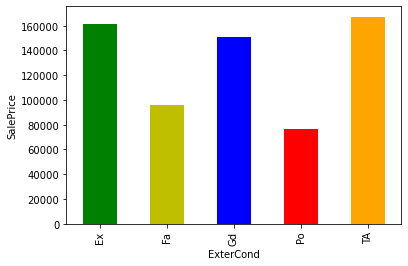

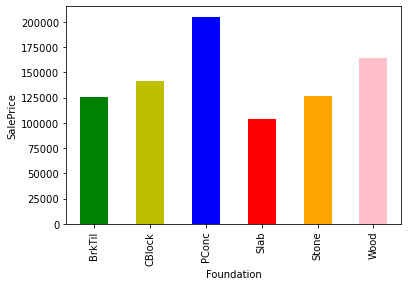

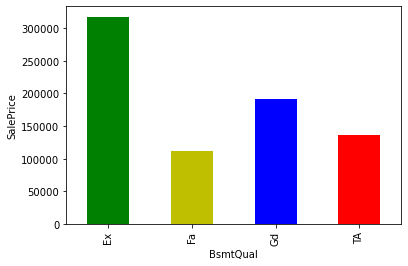

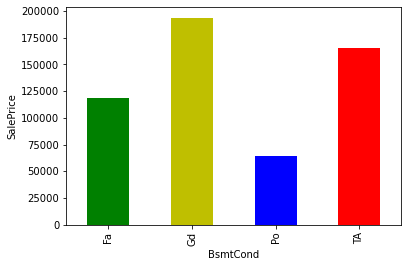

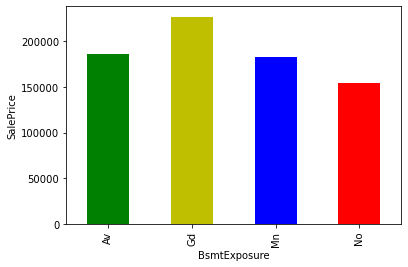

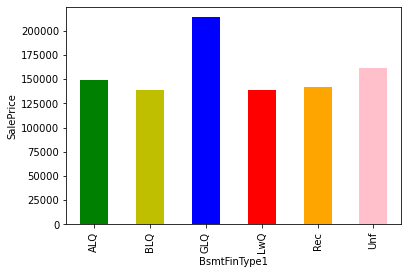

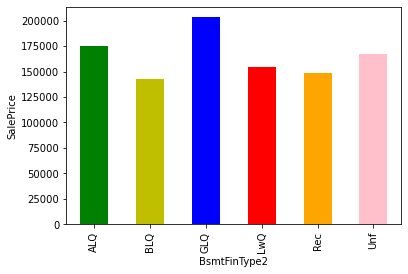

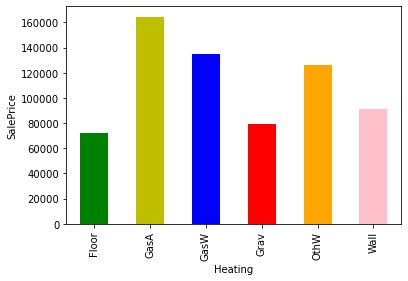

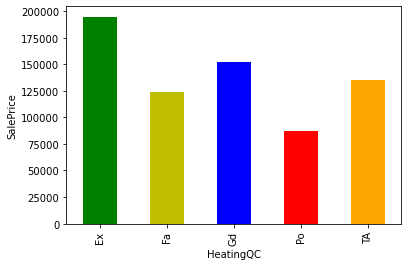

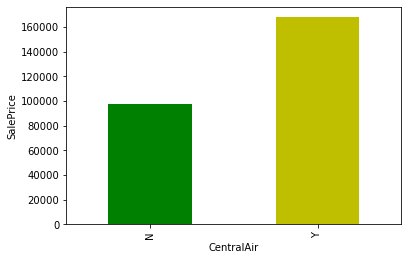

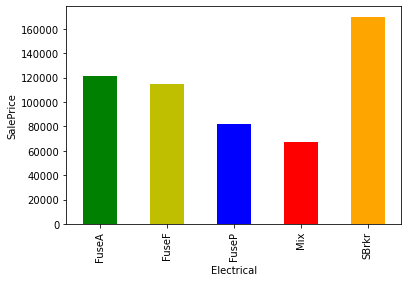

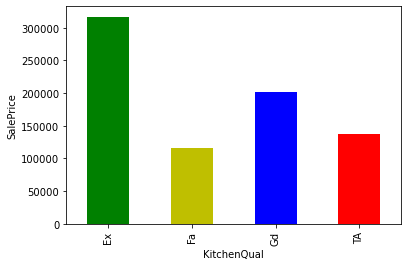

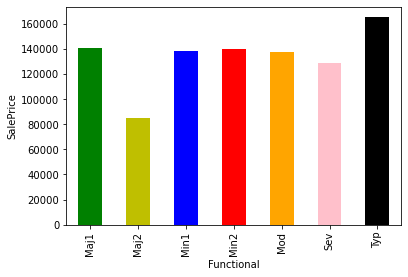

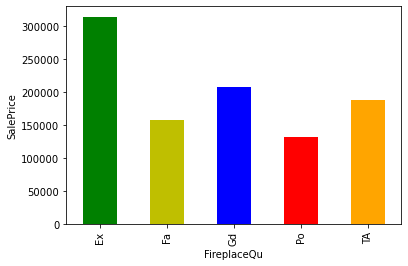

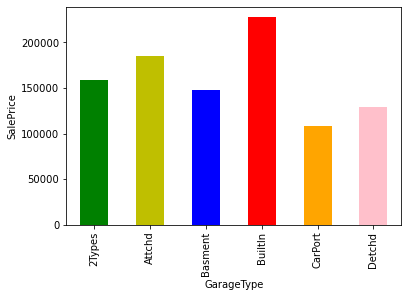

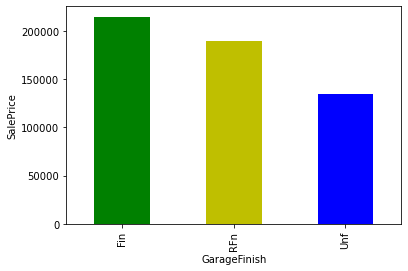

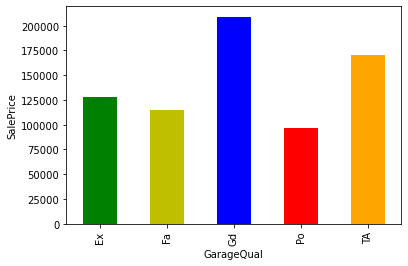

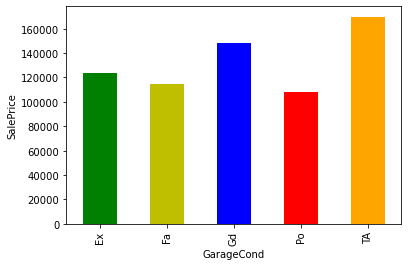

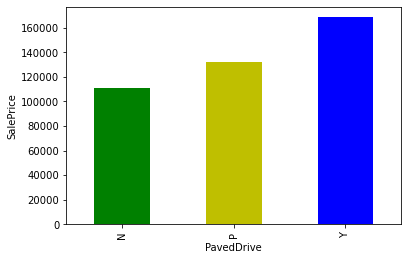

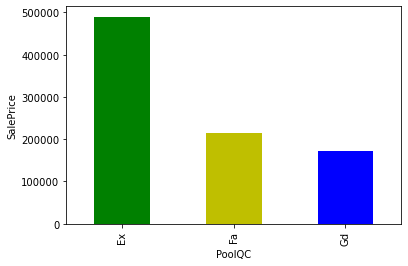

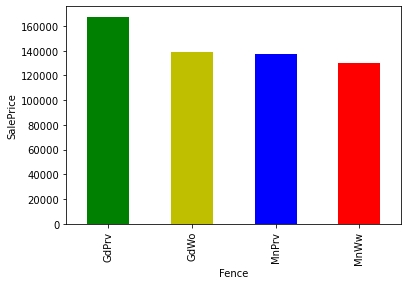

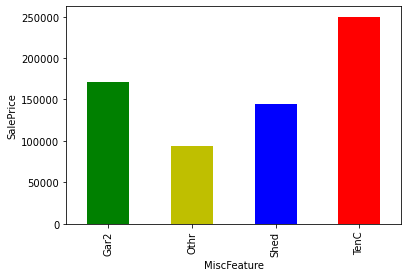

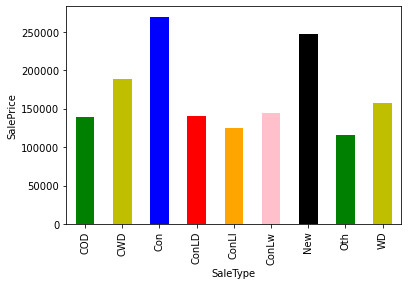

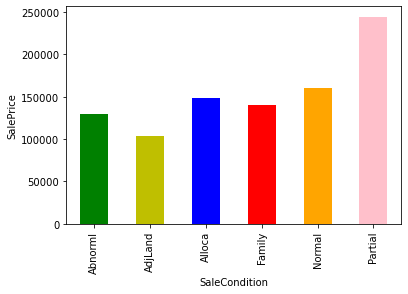

In [120]:
for feature in categorical_variables:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=['g','y','b','r','Orange','Pink','black'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

## FEATURE ENGINEERING

In [121]:
#feature engineeering for temporal variables
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    df[feature]=df['YrSold']-df[feature]

In [122]:
df[dt_time_variables]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008
...,...,...,...,...
1455,8,7,8.0,2007
1456,32,22,32.0,2010
1457,69,4,69.0,2010
1458,60,14,60.0,2010
